## Mohamed BEN ALI SDIA

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, cauchy, norm

# Inverse de la fonction de répartition

In [17]:
# Définition des fonctions nécessaires
lambda_exp = 2
f = lambda x : lambda_exp*np.exp(-lambda_exp*x)
F = lambda x : 1 - np.exp(-lambda_exp*x)
F_inv = lambda u : -np.log(1-u) / lambda_exp

# Définition de la fonction de génération de nombres aléatoires suivant la loi exponentielle
def rng_exp(nb_echantillons) :
    echantillons_unif = uniform.rvs(loc = 0, scale = 1, size = nb_echantillons)
    echantillons_exp = F_inv(echantillons_unif)
    return echantillons_exp

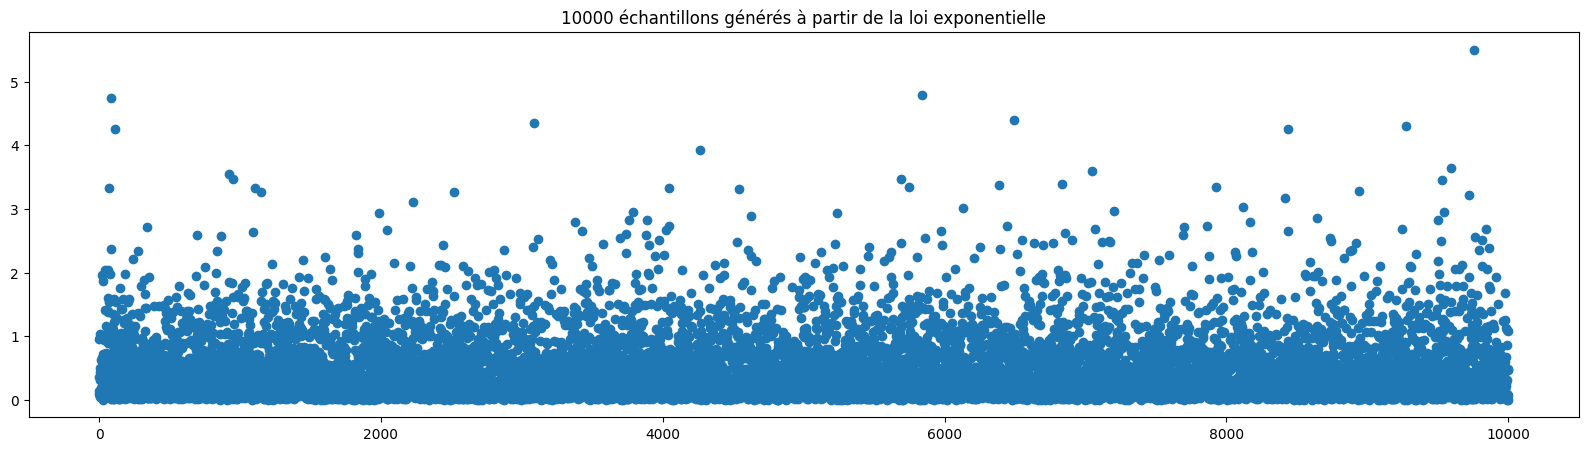

In [18]:
# Affichage pour la génération de 10000 points
samples = rng_exp(10000)
plt.figure(figsize=(20,5))
plt.plot(samples, 'o')
plt.title('10000 échantillons générés à partir de la loi exponentielle')
plt.show()

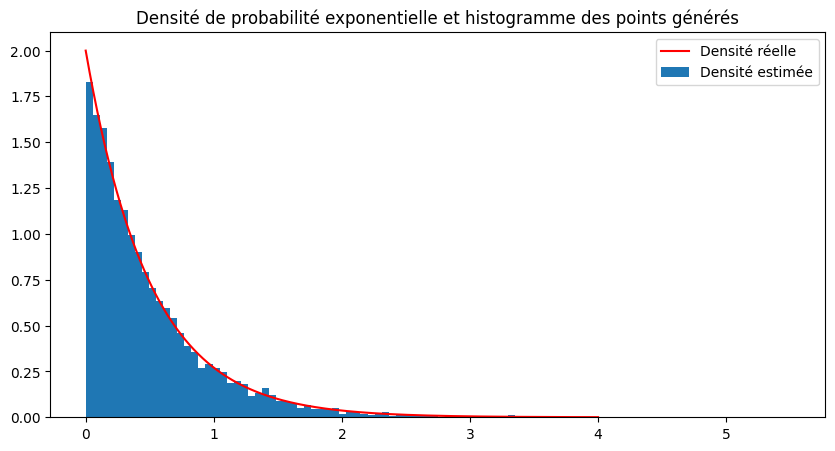

In [19]:
# Affichage sur la même figure de la densité de probabilité exponentielle et des points générées
plt.figure(figsize=(10,5))
plt.hist(samples, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(0, 4, 10000)
plt.plot(t, f(t), 'r')
plt.title('Densité de probabilité exponentielle et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

On constate qu'avec cette méthode, on obtient un bon échantillonnage de la loi exponentielle. Cependant, la principale limitation de cette méthode est qu'il faut être capable de calculer l'inverse généralisée d'une fonction, ce qui n'est pas toujours trivial. En l'occurrence, nous étions dans un cas où l'inverse se calcule simplement.

# Méthode Accept-Reject

In [20]:
# Définition des fonctions et variables nécessaires
g = lambda x : 1 / (np.pi*(1 + x**2))
M = 5

# Définition de la fonction de génération de nombres aléatoires suivant la loi exponentielle
def accept_reject(nb_echantillons, mu_norm) :
    samples = []
    for i in range(nb_echantillons):
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        x = cauchy.rvs(loc = 0, scale = 1, size = 1)
        while(norm.pdf(x=x, loc=mu_norm, scale=1) / (M * cauchy.pdf(x=x, loc=0, scale=1))) < u :
            u = uniform.rvs(loc = 0, scale = 1, size = 1)
            x = cauchy.rvs(loc = 0, scale = 1, size = 1)
        samples.append(x)
    return np.array(samples)

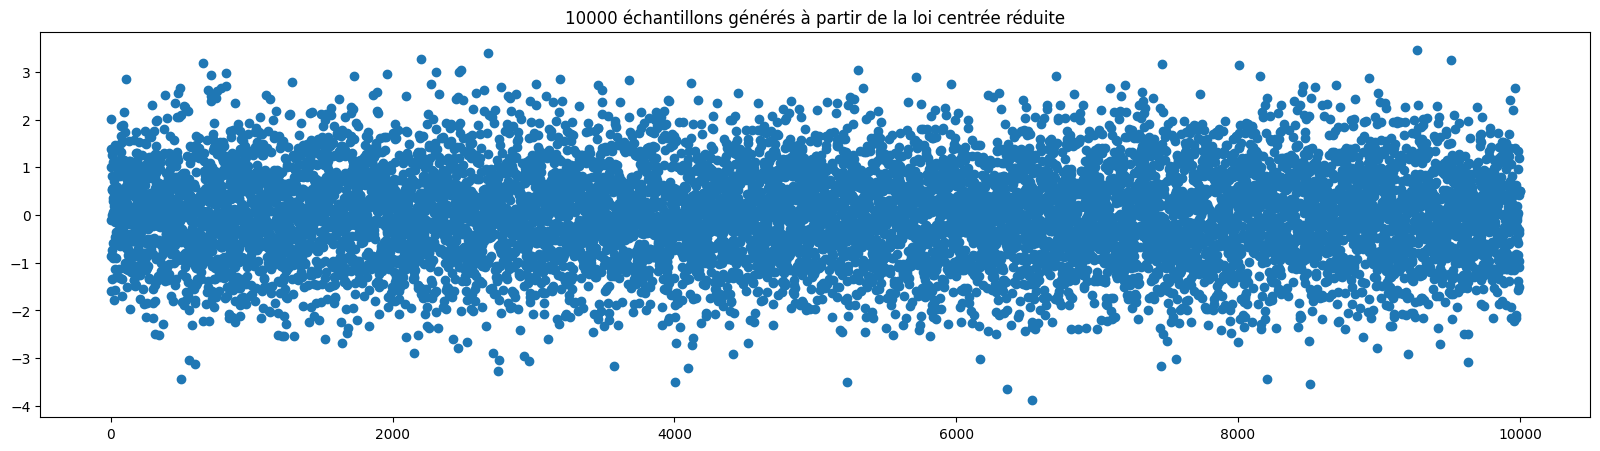

In [21]:
# Affichage pour la génération de 1000 points
samples_cr = accept_reject(10000, 0)
plt.figure(figsize=(20,5))
plt.plot(samples_cr, 'o')
plt.title('10000 échantillons générés à partir de la loi centrée réduite')
plt.show()

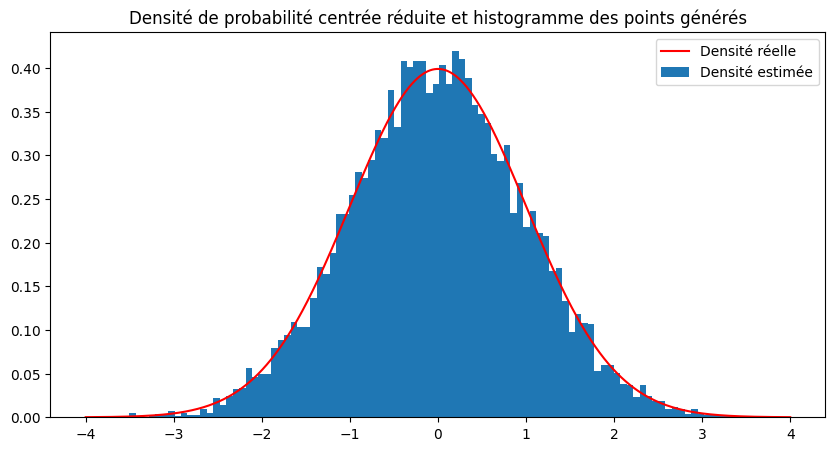

In [22]:
# Affichage sur la même figure de la densité de probabilité centrée réduite et des points générées
plt.figure(figsize=(10,5))
plt.hist(samples_cr, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-4, 4, 10000)
plt.plot(t, norm.pdf(x=t, loc=0, scale=1), 'r')
plt.title('Densité de probabilité centrée réduite et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

#### Échantillonnage de la loi normale (5,1)

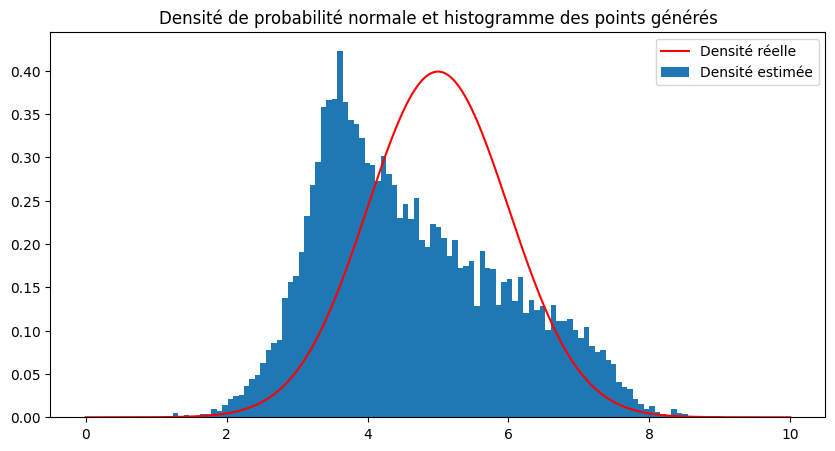

In [23]:
samples_cr_5 = accept_reject(10000, 5)

plt.figure(figsize=(10,5))
plt.hist(samples_cr_5, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(0, 10, 10000)
plt.plot(t, norm.pdf(x=t, loc=5, scale=1), 'r')
plt.title('Densité de probabilité normale et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

On observe que la méthode accept-reject donne de bons résultats pour échantillonner selon une loi normale centrée réduite. En revanche, pour une loi normale centrée en 5 on obtient des résultats beaucoup moins satisfaisants.

# Loi de Bernoulli

In [24]:
p = 0.7

# Définition de la fonction de génération de nombres aléatoires suivant la loi de Bernoulli
def rng_bernoulli(nb_echantillons) :
    echantillons_bernoulli = []
    for i in range(nb_echantillons):
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        if u < p :
            echantillons_bernoulli.append(0)
        else :
            echantillons_bernoulli.append(1)
    return np.array(echantillons_bernoulli)

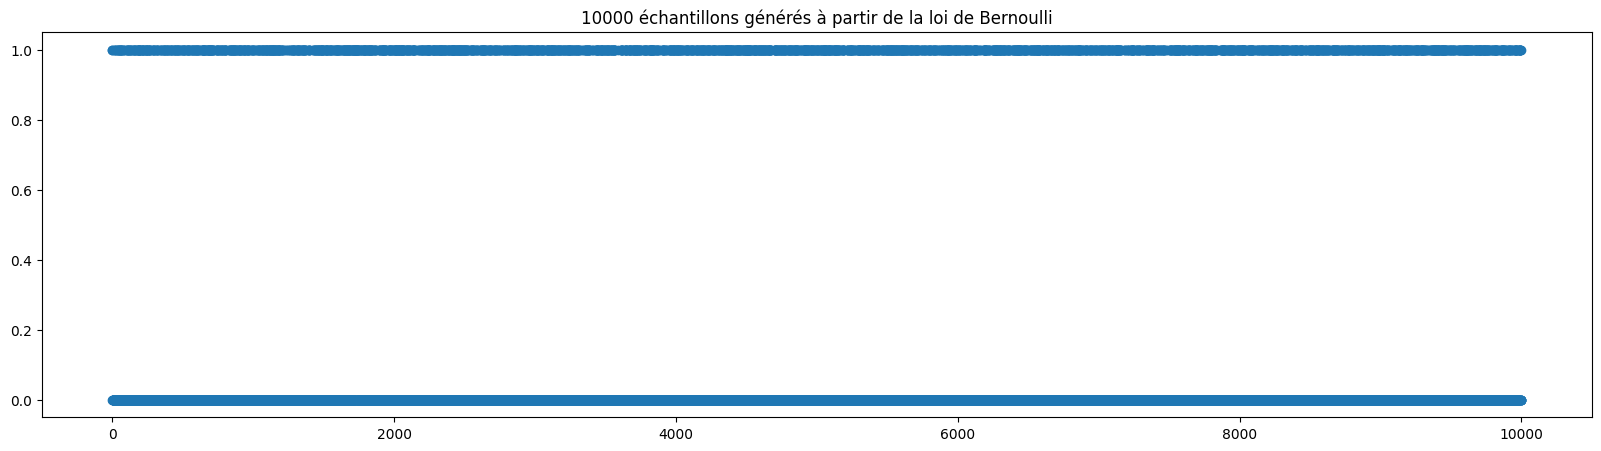

In [25]:
# Affichage pour la génération de 10000 points
samples_br = rng_bernoulli(10000)
plt.figure(figsize=(20,5))
plt.plot(samples_br, 'o')
plt.title('10000 échantillons générés à partir de la loi de Bernoulli')
plt.show()

In [26]:
list(samples_br).count(0) / samples_br.size

0.7098

### Commentaire

Empiriquement, on retrouve bien la probabilité de succès désirée p = 0.7.

# Méthodes de Monte Carlo Markov Chain (MCMC)

### Metropolis-Hastings avec loi de proposition indépendante

#### Unif[-1, 1] et burn-in de 500

In [27]:
# Densité de la loi normale centrée réduite
f = lambda x : np.exp(-(x**2)/2) / np.sqrt(2*np.pi)
# Densité de la loi uniforme sur [-1, 1]
def q(x) :
    if(x >= -1) and (x <= 1) : return 1/2
    else : return 0

def MH_ind(nb_echantillons, temps_chauffe) :
    echantillons_MH_ind= []
    x_t = uniform.rvs(loc = 0, scale = 1, size = 1)
    y_t = uniform.rvs(loc = -1, scale = 2, size = 1)
    for t in range(nb_echantillons + temps_chauffe) :
        rho = min(1, f(y_t)*q(x_t)/(f(x_t)*q(y_t)))
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        if u < rho :
            x_t = y_t
        if(t > temps_chauffe) :
            echantillons_MH_ind.append(x_t)
        y_t = uniform.rvs(loc = -1, scale = 2, size = 1)
    return np.array(echantillons_MH_ind)

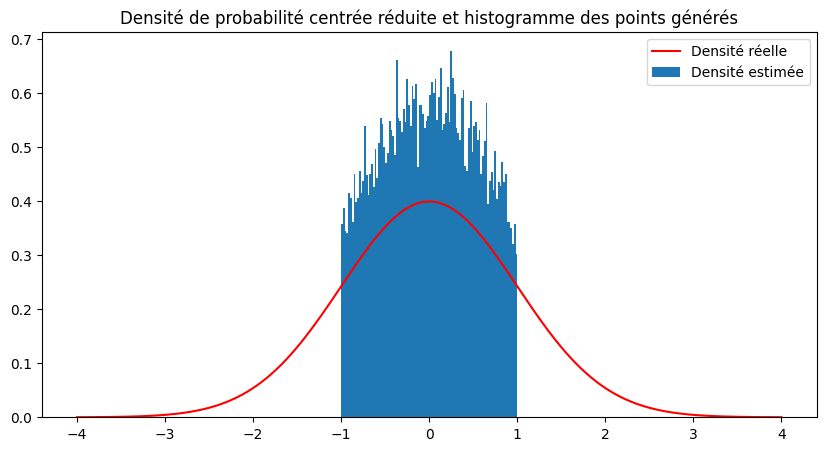

In [28]:
samples_MH_ind = MH_ind(20000, 500)

# Affichage sur la même figure de la densité de probabilité centrée réduite et des points générées
plt.figure(figsize=(10,5))
plt.hist(samples_MH_ind, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-4, 4, 20000)
plt.plot(t, f(t), 'r')
plt.title('Densité de probabilité centrée réduite et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

On observe que toutes les valeurs échantillonnées sont comprises entre -1 et 1 : c'est dû à la loi de proposition qui est uniforme sur [-1,1]. Or, en suivant une loi normale centrée réduite, la probabilité de tirer un nombre hors de [-1,1] n'est pas négligeable : la probabilité de $\mathbb{R} \backslash [-1,1]$ est supérieure à 30%. On en déduit que la loi de proposition n'est pas adaptée. Dans la suite, on utilise donc une loi uniforme sur un intervalle étendu.

#### Unif[-10, 10] et burn-in de 1000

In [29]:
# Densité de la loi normale centrée réduite
f = lambda x : np.exp(-(x**2)/2) / np.sqrt(2*np.pi)
# Densité de la loi uniforme sur [-10, 10]
def q(x) :
    if(x >= -10) and (x <= 10) : return 1/20
    else : return 0

def MH_ind(nb_echantillons, temps_chauffe) :
    echantillons_MH_ind= []
    x_t = uniform.rvs(loc = 0, scale = 1, size = 1)
    y_t = uniform.rvs(loc = -10, scale = 20, size = 1)
    for t in range(nb_echantillons + temps_chauffe) :
        rho = min(1, f(y_t)*q(x_t)/(f(x_t)*q(y_t)))
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        if u < rho :
            x_t = y_t
        if(t > temps_chauffe) :
            echantillons_MH_ind.append(x_t)
        y_t = uniform.rvs(loc = -10, scale = 20, size = 1)
    return np.array(echantillons_MH_ind)

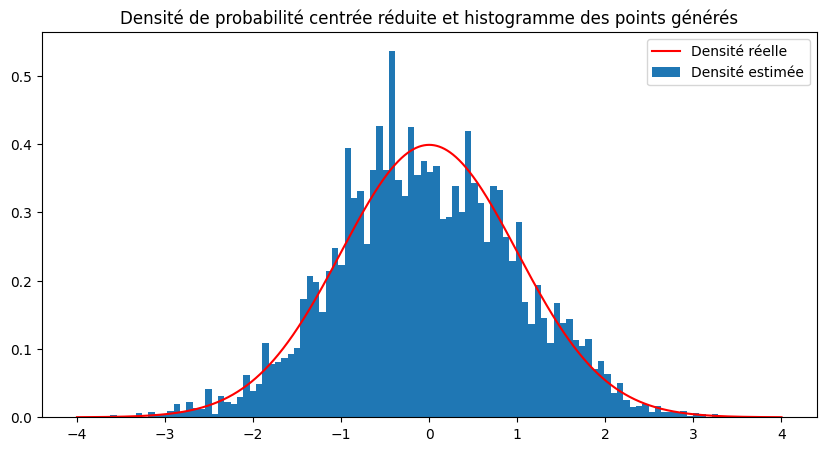

In [30]:
# Affichage sur la même figure de la densité de probabilité centrée réduite et des points générées
samples_MH_ind = MH_ind(20000, 1000)

plt.figure(figsize=(10,5))
plt.hist(samples_MH_ind, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-4, 4, 20000)
plt.plot(t, f(t), 'r')
plt.title('Densité de probabilité centrée réduite et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

Comme on s'y attendait, l'utilisation d'une loi uniforme sur [-10,10] donne de meilleurs résultats, la probabilité de $\mathbb{R} \backslash [-10,10]$ étant négligeable.

On va maintenant s'intéresser à l'influence du burning.

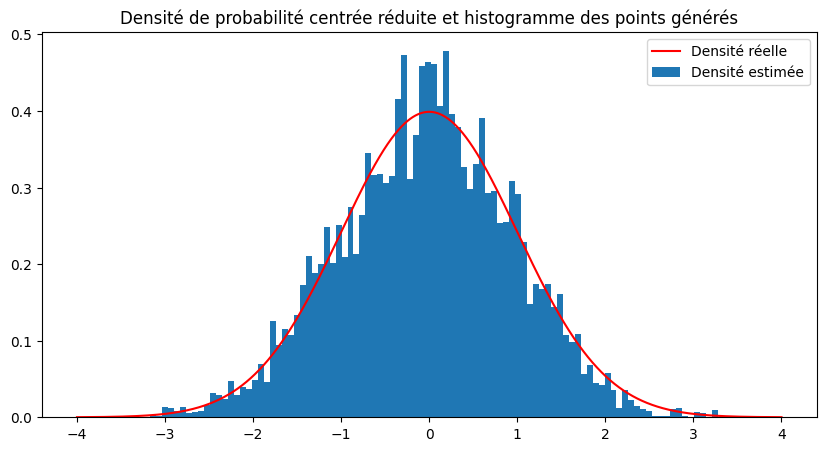

In [31]:
# Affichage sur la même figure de la densité de probabilité centrée réduite et des points générées
samples_MH_ind = MH_ind(20000, 100)

plt.figure(figsize=(10,5))
plt.hist(samples_MH_ind, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-4, 4, 20000)
plt.plot(t, f(t), 'r')
plt.title('Densité de probabilité centrée réduite et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

Dans l'expérimentation ci-dessus, on a réduit le temps de chauffe à 100 en gardant 20000 tirages. On s'attendait à ce que les résultats soient moins bons parce que l'algorithme n'aurait pas eu le temps de converger. Cependant, l'échantillonnage obtenu semble équivalent en qualité à celui obtenu précédemment. On fait la conjecture qu'en raison du nombre d'échantillons élevé, l'influence du temps de chauffe est réduite. Dans l'exemple suivant, on décide donc de diminuer le nombre d'échantillons.

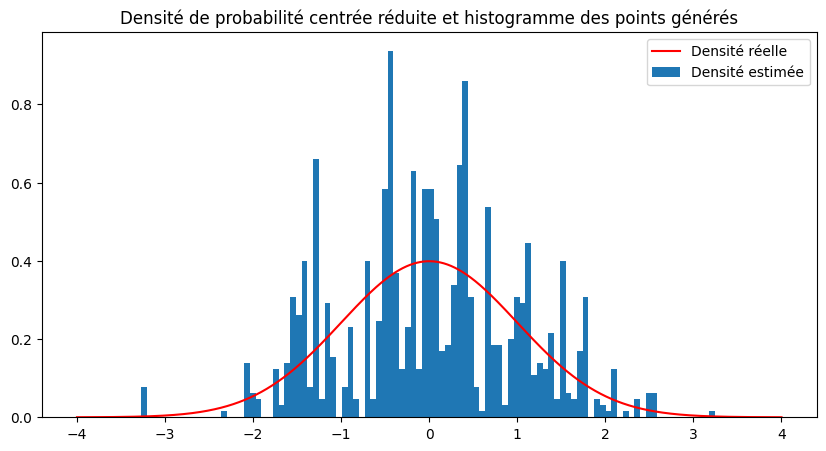

In [32]:
# Affichage sur la même figure de la densité de probabilité centrée réduite et des points générées
samples_MH_ind = MH_ind(1000, 500)

plt.figure(figsize=(10,5))
plt.hist(samples_MH_ind, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-4, 4, 20000)
plt.plot(t, f(t), 'r')
plt.title('Densité de probabilité centrée réduite et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

Comme on s'y attendait, l'échantillonnage semble beaucoup moins bon avec un nombre d'échantillons réduit et un temps de chauffe plus faible.

### Metropolis-Hastings avec une loi à deux modes

In [33]:
# Définition de la loi à deux modes
def f(x, p, mu1, mu2, a1, a2):
    return p / (2*a1) * np.exp(-abs((x-mu1)/a1)) + (1-p) / (2*a2) * np.exp(-abs((x-mu2)/a2))

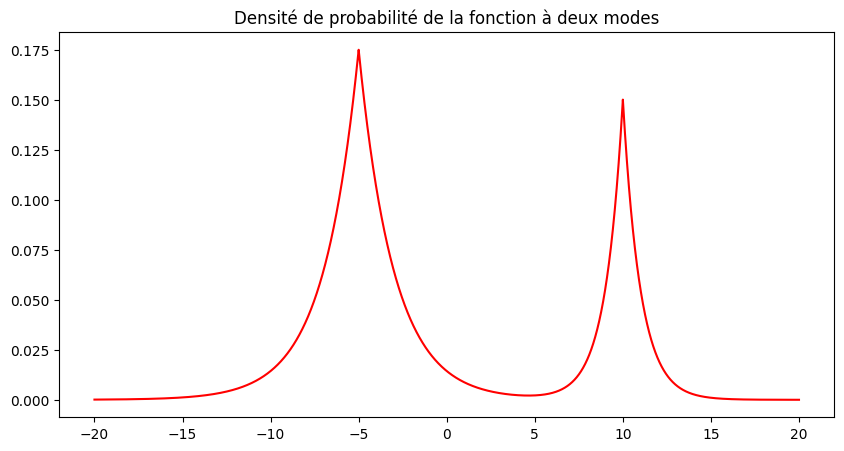

In [34]:
plt.figure(figsize=(10,5))
t = np.linspace(-20, 20, 20000)
plt.plot(t, f(t, 0.3, 10, -5, 1, 2), 'r')
plt.title('Densité de probabilité de la fonction à deux modes')
plt.show()

In [35]:
q = norm

def MH_modes(nb_echantillons, temps_chauffe) :
    echantillons_MH_modes= []
    x_t = uniform.rvs(loc = 0, scale = 1, size = 1)
    y_t = norm.rvs(loc = 0, scale = 20, size = 1)
    for t in range(nb_echantillons + temps_chauffe) :
        rho = min(1, f(y_t, 0.3, 10, -5, 1, 2)*q.pdf(x_t, loc = 0, scale=20)
                  /(f(x_t, 0.3, 10, -5, 1, 2)*q.pdf(y_t, loc = 0, scale=20)))
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        if u < rho :
            x_t = y_t
        if(t > temps_chauffe) :
            echantillons_MH_modes.append(x_t)
        y_t = norm.rvs(loc = 0, scale = 20, size = 1)
    return np.array(echantillons_MH_modes)

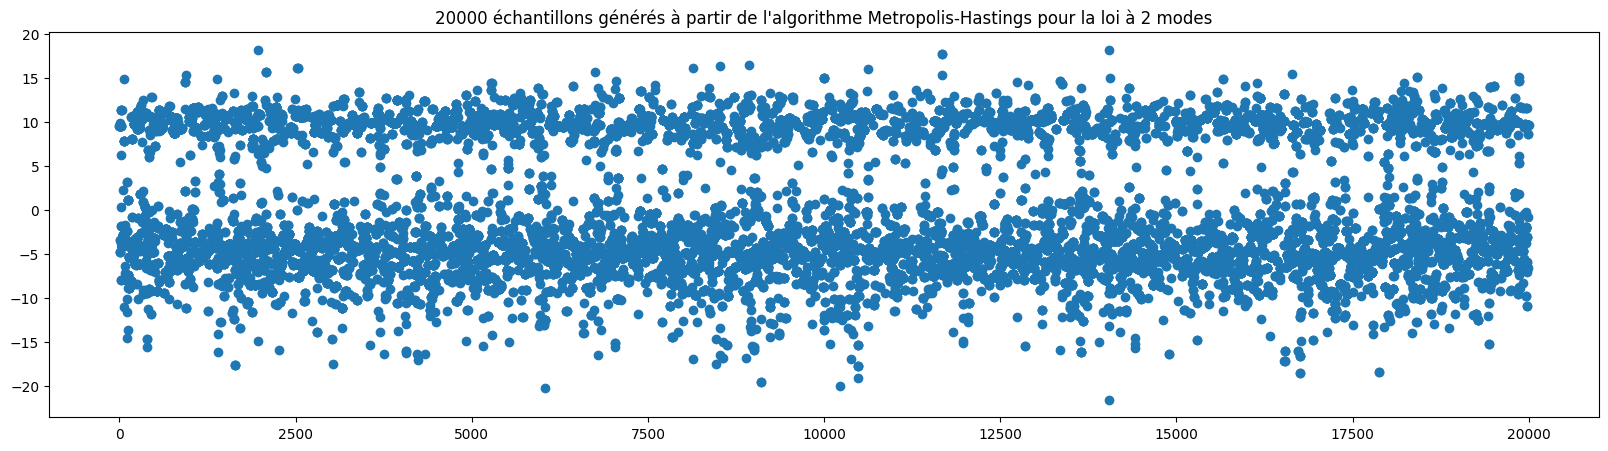

In [36]:
# Affichage pour la génération de 20000 points
samples_MH_modes = MH_modes(20000, 500)
plt.figure(figsize=(20,5))
plt.plot(samples_MH_modes, 'o')
plt.title("20000 échantillons générés à partir de l'algorithme Metropolis-Hastings pour la loi à 2 modes")
plt.show()

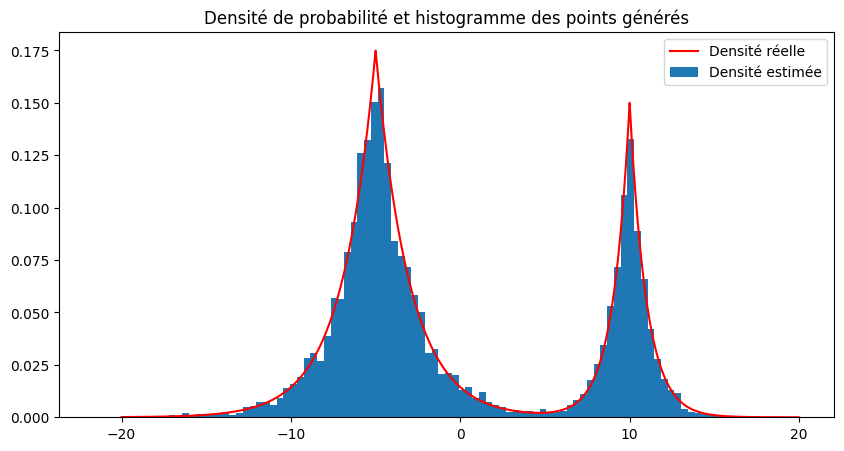

In [37]:
# Affichage sur la même figure de la densité de probabilité et des points générées
plt.figure(figsize=(10,5))
plt.hist(samples_MH_modes, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-20, 20, 20000)
plt.plot(t, f(t, 0.3, 10, -5, 1, 2), 'r')
plt.title('Densité de probabilité et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

### Commentaire

Nous avons choisi d'utiliser la loi normale de moyenne 0 et d'écart-type 20 afin de couvrir la plage de valeurs la plus probable pour la fonction de densité à deux modes. Au vu de l'échantillonnage, ce choix semble pertinent.

### Echantillonnage de Monte Carlo parfait

In [38]:
f = norm
q = uniform

def MH_MC(nb_echantillons, temps_chauffe) :
    echantillons_MH_MC= []
    x_t = uniform.rvs(loc = 0, scale = 1, size = 1)
    y_t = uniform.rvs(loc = -10, scale = 20, size = 1)
    for t in range(nb_echantillons + temps_chauffe) :
        rho = min(1, f.pdf(y_t, loc = 5, scale = 2)*q.pdf(x_t, loc = -10, scale = 20)
                  /(f.pdf(x_t, loc = 5, scale = 2)*q.pdf(y_t, loc = -10, scale = 20)))
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        if u < rho :
            x_t = y_t
        if(t > temps_chauffe) :
            echantillons_MH_MC.append(x_t)
        y_t = uniform.rvs(loc = -10, scale = 20, size = 1)
    return np.array(echantillons_MH_MC)

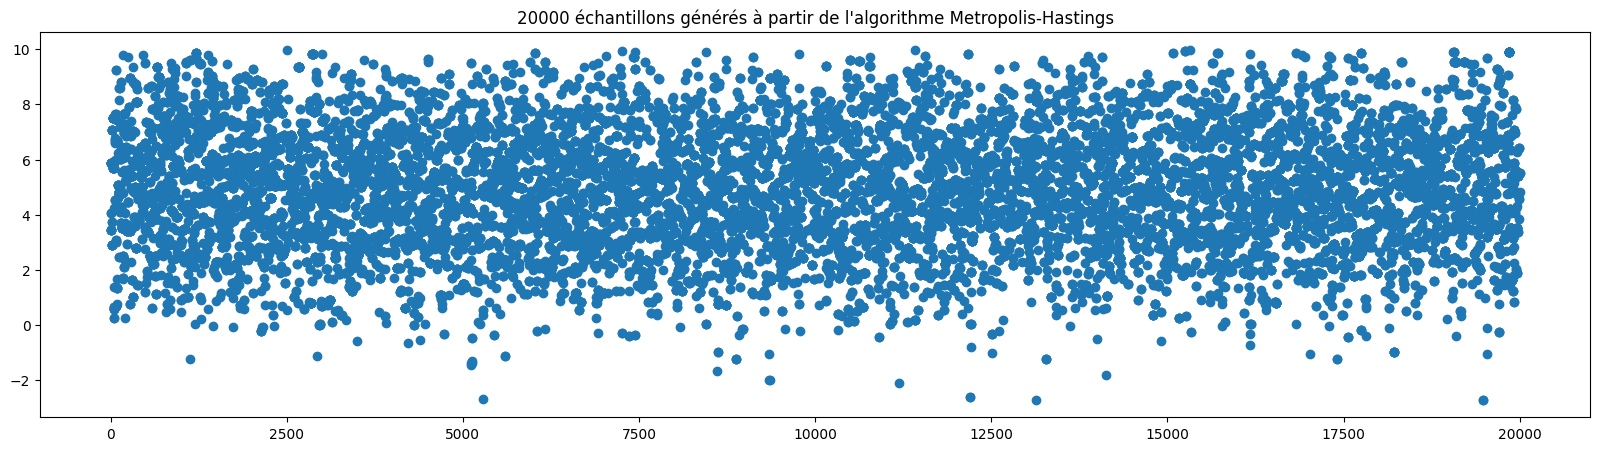

In [39]:
# Affichage pour la génération de 20000 points
samples_MH_MC = MH_MC(20000, 500)
plt.figure(figsize=(20,5))
plt.plot(samples_MH_MC, 'o')
plt.title("20000 échantillons générés à partir de l'algorithme Metropolis-Hastings")
plt.show()

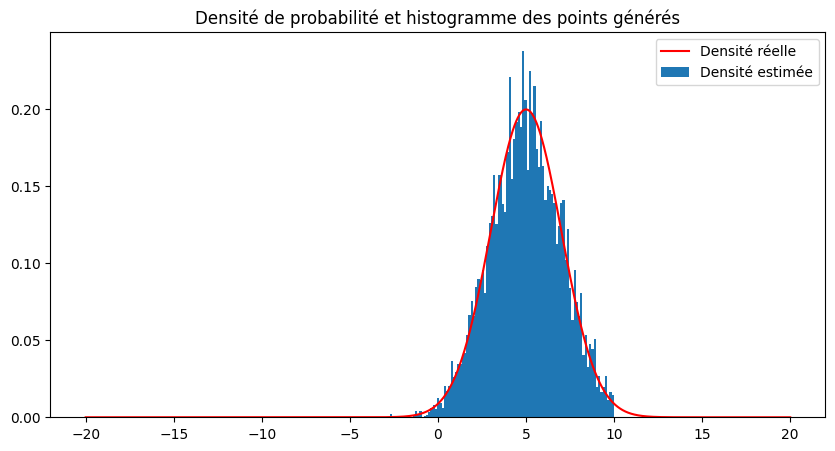

In [40]:
# Affichage sur la même figure de la densité de probabilité et des points générées
plt.figure(figsize=(10,5))
plt.hist(samples_MH_MC, density=True, bins=100) # density=true normalise l'histogramme
t = np.linspace(-20, 20, 20000)
plt.plot(t, f.pdf(t, loc = 5, scale = 2), 'r')
plt.title('Densité de probabilité et histogramme des points générés')
plt.legend(['Densité réelle', 'Densité estimée'])
plt.show()

In [41]:
def mean_with_MC(samples):
    nb_samples = np.size(samples)
    return 1/nb_samples * np.sum(samples)

In [42]:
mean_with_MC(MH_MC(100, 500))

4.316585005157171

#### Avec 100 particules pour 100 calculs de moyenne
On a réduit le nombre de calculs par rapport à ce qui est demandé dans l'énoncé en raison du temps de calcul très important.

0.454431541861341

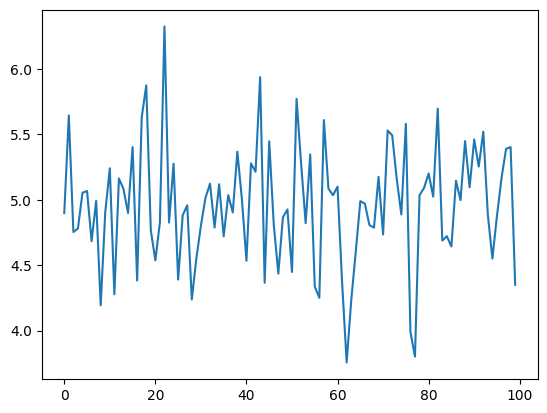

In [43]:
Vm = [mean_with_MC(MH_MC(100, 500)) for _ in range(100)]
plt.plot(Vm)
np.std(Vm)

### Commentaire
On observe qu'avec 100 particules l'échantillonnage de Monte-Carlo permet bien d'estimer la moyenne (qui vaut 5 ici) mais avec une erreur de l'ordre de 8% (on obtient empiriquement un écart type d'environ 0.39 autour de la moyenne).

#### Avec 1000 particules pour 100 calculs de moyenne

0.12693237156054296

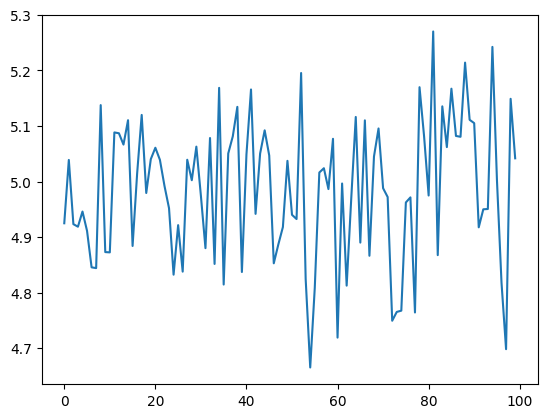

In [44]:
Vm = [mean_with_MC(MH_MC(1000, 500)) for _ in range(100)]
plt.plot(Vm)
np.std(Vm)

### Commentaire

Comme annoncé théoriquement, la variance de l'estimation diminue lorsqu'on augmente le nombre de particules : avec 1000 particules, l'écart-type est d'environ 0.12 < 0.39.

#### Avec 10000 particules pour 100 calculs de moyenne

In [45]:
# Avec 10000 particules pour 100 calculs de moyenne
# Vm = [mean_with_MC(MH_MC(10000, 500)) for _ in range(100)]
# plt.plot(Vm)

# On n'exécute pas cette cellule en raison du temps de calcul, mais on s'attend à une estimation encore plus précise de la moyenne.

# Méthode de Box-Muller

In [46]:
def box_muller(nb_samples):
    samples_z1 = []
    samples_z2 = []
    for _ in range(nb_samples):
        u1 = uniform.rvs(loc=0, scale=1, size=1)
        u2 = uniform.rvs(loc=0, scale=1, size=1)

        R = -2*np.log(u1)
        V = 2 * np.pi * u2

        z1, z2 = np.sqrt(R)*np.cos(V), np.sqrt(R)*np.sin(V)
        samples_z1.append(z1)    
        samples_z2.append(z2)    
    return np.array(samples_z1), np.array(samples_z2)

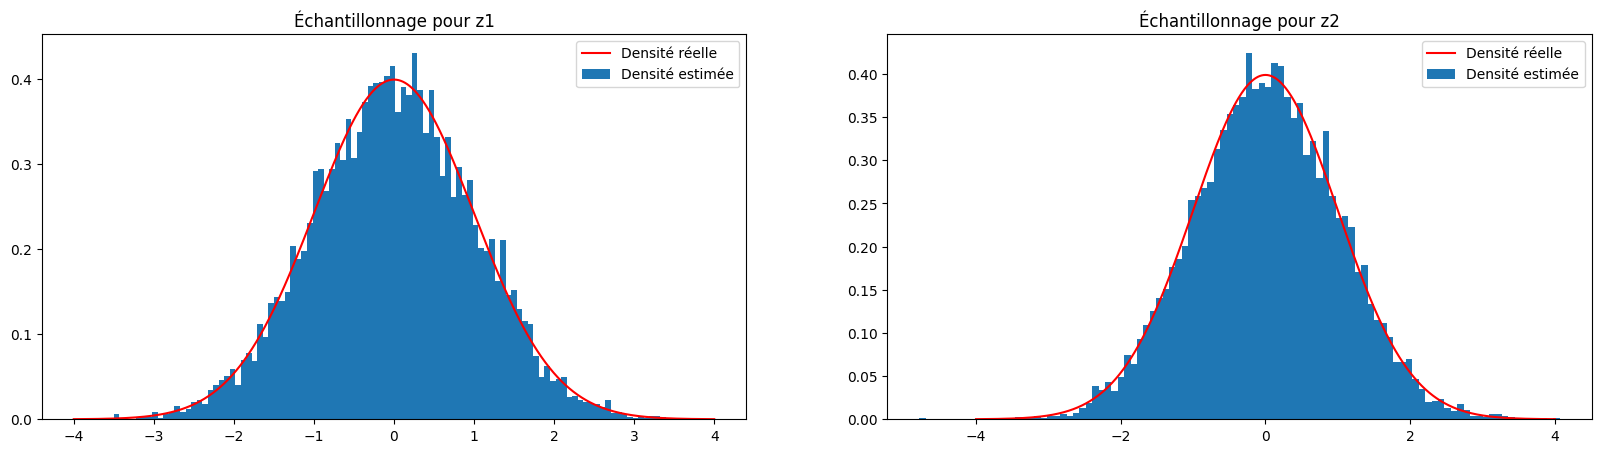

In [47]:
samples_z1, samples_z2 = box_muller(10000)
t = np.linspace(-4, 4, 10000)

fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.hist(samples_z1, density=True, bins=100) # density=true normalise l'histogramme
plt.plot(t, norm.pdf(x=t, loc=0, scale=1), 'r')
plt.title('Échantillonnage pour z1')
plt.legend(['Densité réelle', 'Densité estimée'])


plt.subplot(1, 2, 2)
plt.hist(samples_z2, density=True, bins=100) # density=true normalise l'histogramme
plt.plot(t, norm.pdf(x=t, loc=0, scale=1), 'r')
plt.title('Échantillonnage pour z2')
plt.legend(['Densité réelle', 'Densité estimée'])

plt.show()

### Commentaire

On constate que les deux composantes $z_1$, $z_2$ ont bien été échantillonnées suivant la loi normale centrée réduite. Ainsi, le vecteur $Z = (z_1, z_2)$ suit bien une loi normale bivariée réduite.